In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_dom=pd.read_csv('domestic_visitors.csv')


In [3]:
df_for=pd.read_csv('foreign_visitors.csv')

In [4]:
df_dom.drop('Unnamed: 0',inplace=True,axis=1)

In [5]:
df_for.drop('Unnamed: 0',inplace=True,axis=1)

In [6]:
df_dom.replace([" ",np.nan], 0, inplace=True)


In [7]:
df_for.replace([" ",np.nan], 0, inplace=True)

In [8]:
df_dom.isnull().sum()

district    0
date        0
month       0
year        0
visitors    0
dtype: int64

In [9]:
df_dom.sample(5)

,district,date,month,year,visitors
1034,Siddipet,01-03-2018,March,2018,164800
155,Mahbubnagar,01-12-2016,December,2016,210202
978,Nizamabad,01-07-2018,July,2018,5882
1241,Komaram Bheem Asifabad,01-06-2019,June,2019,506
418,Jagtial,01-11-2017,November,2017,348042


In [10]:
df_dom=df_dom.astype({'date':'datetime64','visitors':'int64'})
df_for=df_for.astype({'date':'datetime64','visitors':'int64'})

In [11]:
df_dom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   district  1512 non-null   object        
 1   date      1512 non-null   datetime64[ns]
 2   month     1512 non-null   object        
 3   year      1512 non-null   int64         
 4   visitors  1512 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 59.2+ KB


# 1)  Top_10 Districts for domestic visitors

In [12]:
top10_dom_visitors=df_dom.groupby('district').agg({'visitors':'sum'}).sort_values('visitors',ascending=False).head(10)
top10_dom_visitors

,visitors
district,
Hyderabad,83900960
Rajanna Sircilla,41763276
Warangal (Urban),30726603
Yadadri Bhongir,26893080
Bhadradri Kothagudem,21600962
Medak,20542639
Jayashankar Bhoopalpally,19632865
Mahbubnagar,17180118
Nirmal,13315796


<Axes: xlabel='visitors', ylabel='district'>

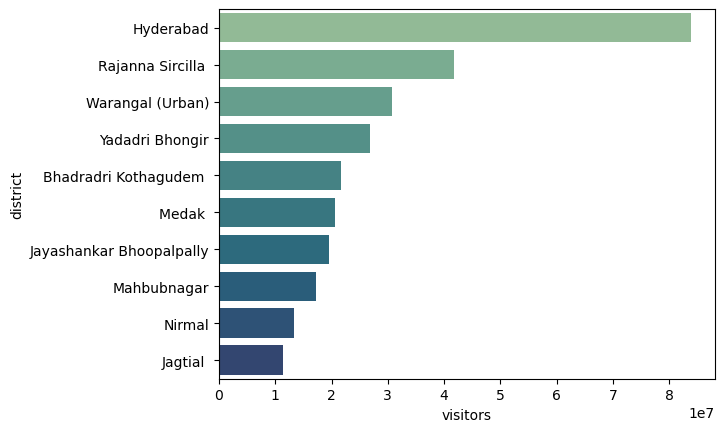

In [13]:
sns.barplot(y=top10_dom_visitors.index,x=top10_dom_visitors.visitors,palette='crest')

# 2) Domestic Top_3 CAGR

In [14]:
pd.set_option('display.max_rows', None)
df_dom.groupby(['year','district']).agg({'visitors':'sum'})

visitors
year district                          
2016 Adilabad                   5075557
     Bhadradri Kothagudem        889030
     Hyderabad                 23394705
     Jagtial                     623077
     Jangaon                      40660
     Jayashankar Bhoopalpally    243400
     Jogulamba Gadwal            523401
     Kamareddy                      127
     Karimnagar                 9167468
     Khammam                    5005031
     Komaram Bheem Asifabad           0
     Mahabubabad                 140002
     Mahbubnagar                8304766
     Mancherial                    7802
     Medak                      3463200
     Medchal                          0
     Nagarkurnool                588473
     Nalgonda                   5858461
     Nirmal                      916610
     Nizamabad                     6442
     Peddapalli                    3244
     Rajanna Sircilla           2176801
     Ranga Reddy                      0
     Sangareddy                  778000
     Siddipet                    358400
     Suryapet                         0
     Vikarabad                        0
     Wanaparthy                   60138
     Warangal (Rural)             19400
     Warangal (Urban)          25788035
     Yadadri Bhongir            1728600
2017 Adilabad                    825380
     Bhadradri Kothagudem       4094317
     Hyderabad                 27160242
     Jagtial                    3641401
     Jangaon                     165708
     Jayashankar Bhoopalpally   1831010
     Jogulamba Gadwal           2245399
     Kamareddy                      540
     Karimnagar                  123976
     Khammam                    1542403
     Komaram Bheem Asifabad       50991
     Mahabubabad                 141815
     Mahbubnagar                3488229
     Mancherial                  191626
     Medak                      7726869
     Medchal                          0
     Nagarkurnool               2653645
     Nalgonda                    241916
     Nirmal                     4405083
     Nizamabad                    21949
     Peddapalli                   14898
     Rajanna Sircilla          11919347
     Ranga Reddy                      0
     Sangareddy                 2823450
     Siddipet                   1145721
     Suryapet                         0
     Vikarabad                        0
     Wanaparthy                  244701
     Warangal (Rural)            144250
     Warangal (Urban)           1420002
     Yadadri Bhongir            7001728
2018 Adilabad                    644743
     Bhadradri Kothagudem       3799878
     Hyderabad                 19543651
     Jagtial                    3952921
     Jangaon                     291022
     Jayashankar Bhoopalpally  16895925
     Jogulamba Gadwal           2036545
     Kamareddy                      572
     Karimnagar                   93448
     Khammam                    1417441
     Komaram Bheem Asifabad       22554
     Mahabubabad                 165995
     Mahbubnagar                2852308
     Mancherial                  398004
     Medak                      3900000
     Medchal                          0
     Nagarkurnool               2088925
     Nalgonda                    160638
     Nirmal                     4177325
     Nizamabad                    41423
     Peddapalli                   22254
     Rajanna Sircilla          10834231
     Ranga Reddy                      0
     Sangareddy                 2269900
     Siddipet                   1283300
     Suryapet                         0
     Vikarabad                        0
     Wanaparthy                  286600
     Warangal (Rural)            302012
     Warangal (Urban)           1723336
     Yadadri Bhongir           13673378
2019 Adilabad                    775895
     Bhadradri Kothagudem      12817737
     Hyderabad                 13802362
     Jagtial                    3086115
     Jangaon                     328890
     Jayashankar Bhoopalpally  

In [15]:
districts=df_dom['district'].unique()

In [16]:
domestic = pd.DataFrame({"district":districts})

In [17]:
dom_df_2016=[]
for i in districts:
    dom_2016=df_dom[df_dom['year']==2016]
    domestic_2016=dom_2016[dom_2016['district']==i].visitors.sum()
    dom_df_2016.append(domestic_2016)
domestic['2016']=dom_df_2016

    
    


In [18]:
dom_df_2019=[]
for i in districts:
    dom_2019=df_dom[df_dom['year']==2019]
    domestic_2019=dom_2019[dom_2019['district']==i].visitors.sum()
    dom_df_2019.append(domestic_2019)
domestic['2019']=dom_df_2019

In [19]:
CAGR=[]
for i in range(len(districts)):
    num=domestic.loc[i,'2019']
    den=domestic.loc[i,'2016']
    cagr_value=(((num/den)**(1/3))-1)
    CAGR.append(cagr_value)
CAGR
    

C:\Users\deves\AppData\Local\Temp\ipykernel_24616\1018806597.py:5: RuntimeWarning: divide by zero encountered in longlong_scalars
  cagr_value=(((num/den)**(1/3))-1)
C:\Users\deves\AppData\Local\Temp\ipykernel_24616\1018806597.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  cagr_value=(((num/den)**(1/3))-1)


[-0.46530464095306356,
 1.433875243991837,
 -0.1612897573959181,
 0.7046038372423757,
 1.0073715506340157,
 0.3962450875807555,
 0.5654625874688981,
 0.6140333794567416,
 -0.7962955009992503,
 -0.34391989466989636,
 inf,
 0.029777849472204965,
 -0.3267036045022478,
 2.257997139428359,
 0.1633432982468157,
 nan,
 0.5265199127053981,
 -0.7113348807658993,
 0.6088075773938375,
 0.9302929901463035,
 0.7225689895442873,
 0.9774858257457022,
 nan,
 0.8020953731607485,
 1.027671552477179,
 nan,
 nan,
 0.7060791702501732,
 1.6314546875673206,
 -0.588628738295105,
 0.3745601828345997,
 inf,
 inf]

In [20]:
domestic['CAGR']=CAGR

In [21]:
domestic=domestic.replace([np.inf,np.nan],0)

In [22]:
domestic_cagr_top3=domestic.sort_values('CAGR',ascending=False).head(3)

<Axes: xlabel='district', ylabel='CAGR'>

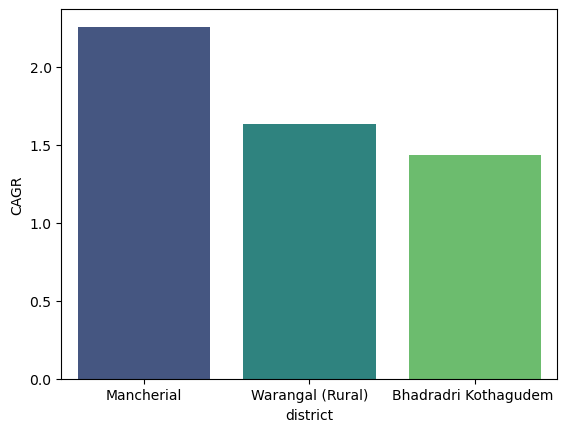

In [23]:
sns.barplot(data=domestic_cagr_top3,x='district',y='CAGR',palette='viridis')

# 2) Foreign Top3 district CAGR

In [24]:
pd.set_option('display.max_rows', None)
df_for.groupby(['year','district']).agg({'visitors':'sum'})

visitors
year district                          
2016 Adilabad                        10
     Bhadradri Kothagudem             0
     Hyderabad                   163631
     Jagtial                          0
     Jangaon                          2
     Jayashankar Bhoopalpally        86
     Jogulamba Gadwal                45
     Kamareddy                        0
     Karimnagar                       0
     Khammam                          0
     Komaram Bheem Asifabad           0
     Mahabubabad                      0
     Mahbubnagar                    868
     Mancherial                       0
     Medak                            0
     Medchal                          0
     Nagarkurnool                    29
     Nalgonda                         0
     Nirmal                           0
     Nizamabad                        0
     Peddapalli                       0
     Rajanna Sircilla                 0
     Ranga Reddy                      0
     Sangareddy                       0
     Siddipet                         0
     Suryapet                         0
     Vikarabad                        0
     Wanaparthy                       0
     Warangal (Rural)                 0
     Warangal (Urban)              1899
     Yadadri Bhongir                  0
2017 Adilabad                        11
     Bhadradri Kothagudem             0
     Hyderabad                   247179
     Jagtial                          0
     Jangaon                          0
     Jayashankar Bhoopalpally       582
     Jogulamba Gadwal               305
     Kamareddy                        0
     Karimnagar                       0
     Khammam                          0
     Komaram Bheem Asifabad           0
     Mahabubabad                      0
     Mahbubnagar                    520
     Mancherial                       0
     Medak                            0
     Medchal                          0
     Nagarkurnool                   311
     Nalgonda                         0
     Nirmal                           0
     Nizamabad                        2
     Peddapalli                       0
     Rajanna Sircilla                 0
     Ranga Reddy                      0
     Sangareddy                       0
     Siddipet                         0
     Suryapet                         0
     Vikarabad                        0
     Wanaparthy                       0
     Warangal (Rural)               306
     Warangal (Urban)              2630
     Yadadri Bhongir                  0
2018 Adilabad                         5
     Bhadradri Kothagudem             0
     Hyderabad                   314788
     Jagtial                          0
     Jangaon                          0
     Jayashankar Bhoopalpally       539
     Jogulamba Gadwal               300
     Kamareddy                        0
     Karimnagar                       0
     Khammam                          0
     Komaram Bheem Asifabad           0
     Mahabubabad                      0
     Mahbubnagar                    454
     Mancherial                       0
     Medak                            0
     Medchal                          0
     Nagarkurnool                   222
     Nalgonda                         0
     Nirmal                           2
     Nizamabad                        2
     Peddapalli                       0
     Rajanna Sircilla                 0
     Ranga Reddy                      0
     Sangareddy                       0
     Siddipet                         0
     Suryapet                         0
     Vikarabad                        0
     Wanaparthy                       0
     Warangal (Rural)                 0
     Warangal (Urban)              1842
     Yadadri Bhongir                  0
2019 Adilabad                         6
     Bhadradri Kothagudem             0
     Hyderabad                   319300
     Jagtial                          0
     Jangaon                          0
     Jayashankar Bhoopalpally  

In [25]:
foreign=pd.DataFrame({'district':districts})

In [26]:
for_df_2016=[]
for i in districts:
    for_2016=df_for[df_for['year']==2016]
    foreign_2016=for_2016[for_2016['district']==i].visitors.sum()
    for_df_2016.append(foreign_2016)
foreign['2016']=for_df_2016

In [27]:
for_df_2019=[]
for i in districts:
    for_2019=df_for[df_for['year']==2019]
    foreign_2019=for_2019[for_2019['district']==i].visitors.sum()
    for_df_2019.append(foreign_2019)
foreign['2019']=for_df_2019

In [28]:
foreign


,district,2016,2019
0,Adilabad,10,6
1,Bhadradri Kothagudem,0,0
2,Hyderabad,163631,319300
3,Jagtial,0,0
4,Jangaon,2,0
5,Jayashankar Bhoopalpally,86,45
6,Jogulamba Gadwal,45,295
7,Kamareddy,0,0
8,Karimnagar,0,0
9,Khammam,0,0


In [29]:
CAGR=[]
for i in range(len(districts)):
    num=foreign.loc[i,'2019']
    den=foreign.loc[i,'2016']
    cagr_values=(((num/den)**(1/3))-1)
    CAGR.append(cagr_values)

C:\Users\deves\AppData\Local\Temp\ipykernel_24616\2825409384.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  cagr_values=(((num/den)**(1/3))-1)
C:\Users\deves\AppData\Local\Temp\ipykernel_24616\2825409384.py:5: RuntimeWarning: divide by zero encountered in longlong_scalars
  cagr_values=(((num/den)**(1/3))-1)


In [30]:
foreign['CAGR']=CAGR

In [31]:
foreign=foreign.replace([np.inf,np.nan],0)


In [32]:
foreign_district_top3=foreign.sort_values('CAGR',ascending=False).head(3)

<Axes: xlabel='district', ylabel='CAGR'>

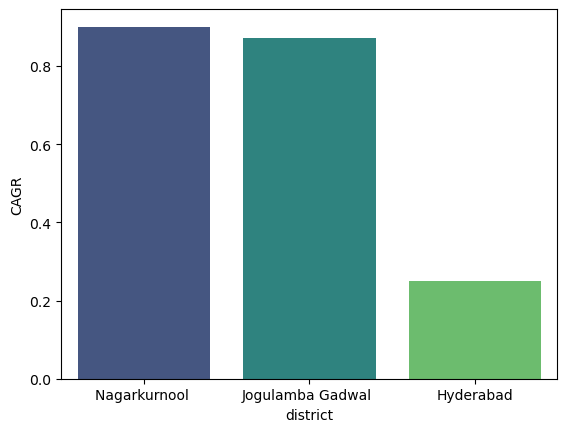

In [33]:
sns.barplot(foreign_district_top3,x='district',y='CAGR',palette='viridis')

In [34]:
bottom3_district_dom=domestic.sort_values('CAGR',ascending=True).head(3)

<Axes: xlabel='district', ylabel='CAGR'>

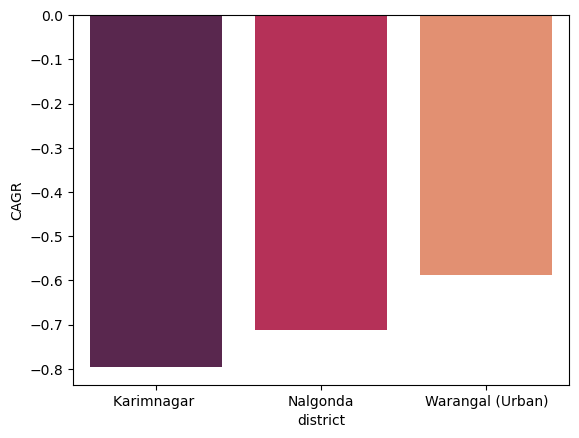

In [35]:
sns.barplot(bottom3_district_dom,y='CAGR',x='district',palette='rocket')

In [36]:
bottom3_district_for=foreign.sort_values('CAGR',ascending=True).head(3)

<Axes: xlabel='district', ylabel='CAGR'>

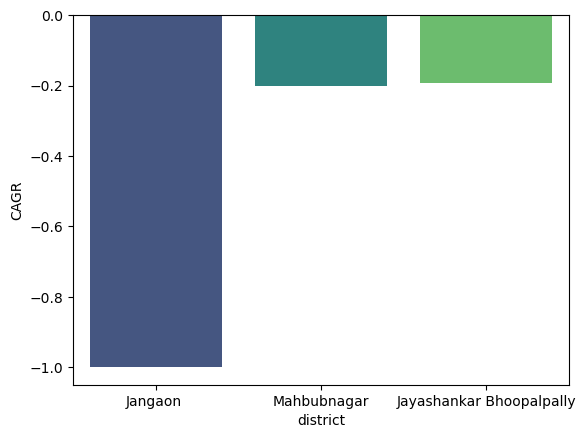

In [37]:
sns.barplot(bottom3_district_for,y='CAGR',x='district',palette='viridis')

In [38]:
dom_visitors_month=df_dom.groupby('month').agg({'visitors':'sum'}).sort_values('visitors',ascending=False)
peak_month_visit_dom=dom_visitors_month.head(3)
peak_month_visit_dom

,visitors
month,
February,58075723
June,43137559
January,41382607


<Axes: xlabel='month', ylabel='visitors'>

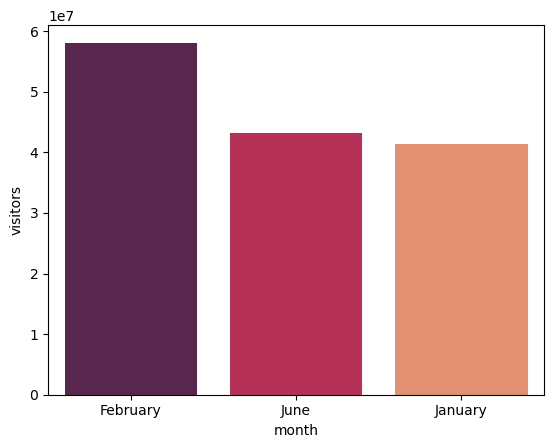

In [39]:
sns.barplot(peak_month_visit_dom,y='visitors',x=peak_month_visit_dom.index,palette='rocket')

In [40]:
bottom_month_visit=dom_visitors_month.tail(3)
bottom_month_visit

,visitors
month,
August,22312789
September,20810933
July,19172962


<Axes: xlabel='month', ylabel='visitors'>

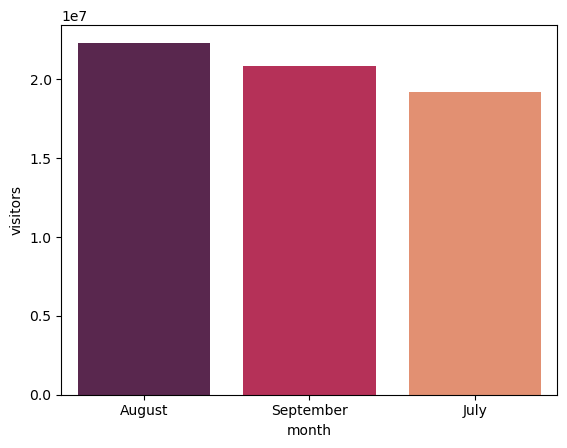

In [41]:
sns.barplot(bottom_month_visit,x=bottom_month_visit.index,y='visitors',palette='rocket')

In [42]:
for_visitors_month=df_for.groupby('month').agg({'visitors':'sum'}).sort_values('visitors',ascending=False)
peak_month_visit_for=for_visitors_month.head(3)
for_visitors_month

,visitors
month,
December,121239
January,108128
February,105273
October,99129
September,95370
November,94926
August,85016
July,81635
March,77675


<Axes: xlabel='month', ylabel='visitors'>

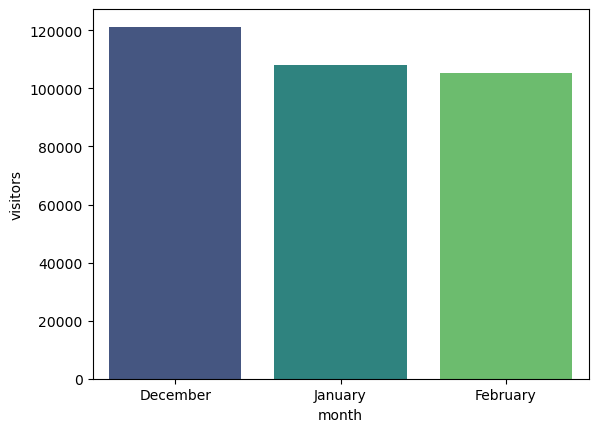

In [43]:
sns.barplot(peak_month_visit_for,y='visitors',x=peak_month_visit_for.index,palette='viridis')

In [44]:
bottom_month_visit_for=for_visitors_month.tail(3)

<Axes: xlabel='month', ylabel='visitors'>

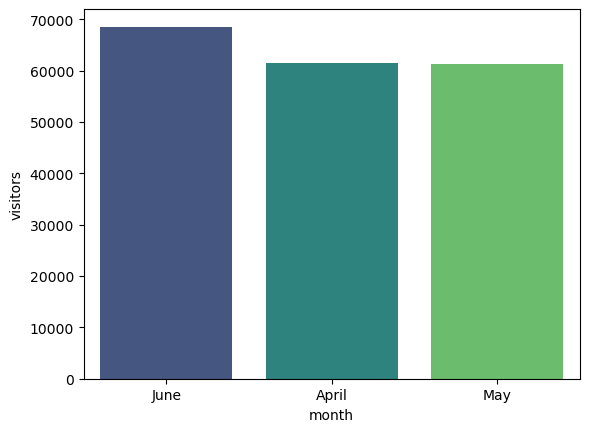

In [45]:
sns.barplot(bottom_month_visit_for,x=bottom_month_visit_for.index,y='visitors',palette='viridis')

In [46]:
df=pd.DataFrame({'district':districts})
df

,district
0,Adilabad
1,Bhadradri Kothagudem
2,Hyderabad
3,Jagtial
4,Jangaon
5,Jayashankar Bhoopalpally
6,Jogulamba Gadwal
7,Kamareddy
8,Karimnagar
9,Khammam


In [47]:
df=pd.DataFrame({'Foreign':df_for.groupby('district')['visitors'].sum()})

In [48]:
df['Domestic']=df_dom.groupby('district')['visitors'].sum()

In [49]:
df

,Foreign,Domestic
district,,
Adilabad,32,7321575.0
Bhadradri Kothagudem,0,21600962.0
Hyderabad,1044898,83900960.0
Jagtial,0,11303514.0
Jangaon,2,826280.0
Jayashankar Bhoopalpally,1252,19632865.0
Jogulamba Gadwal,945,6813340.0
Kamareddy,0,1773.0
Karimnagar,0,9462383.0


In [50]:
ratios=[]
for i in range(len(districts)):
    ratio=df.iloc[i,1]/df.iloc[i,0]
    ratios.append(ratio)
    
df['Ratio']=ratios

C:\Users\deves\AppData\Local\Temp\ipykernel_24616\1266554373.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  ratio=df.iloc[i,1]/df.iloc[i,0]
C:\Users\deves\AppData\Local\Temp\ipykernel_24616\1266554373.py:3: RuntimeWarning: invalid value encountered in double_scalars
  ratio=df.iloc[i,1]/df.iloc[i,0]


In [51]:
df=df.replace([np.nan,np.inf],0)

In [52]:
df_ratios=df.sort_values('Ratio',ascending=False).where(df['Foreign']>500)

In [53]:
df_ratios=df_ratios.dropna()

<Axes: xlabel='Ratio', ylabel='district'>

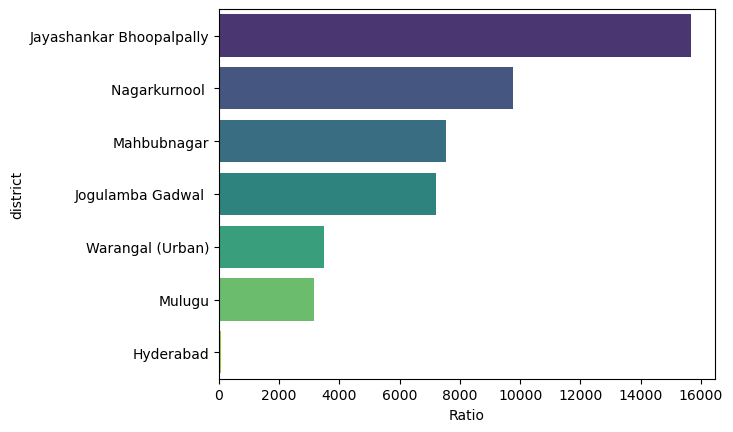

In [54]:
sns.barplot(df_ratios,y=df_ratios.index,x='Ratio',palette='viridis')

In [55]:
population=pd.read_csv(r'population.csv',encoding='cp1252')

In [56]:
population.drop(['Unnamed: 0'],axis=1,inplace=True)

In [57]:
df.reset_index(drop=True)


,Foreign,Domestic,Ratio
0,32,7321575.0,2.287992e+05
1,0,21600962.0,0.000000e+00
2,1044898,83900960.0,8.029584e+01
3,0,11303514.0,0.000000e+00
4,2,826280.0,4.131400e+05
5,1252,19632865.0,1.568120e+04
6,945,6813340.0,7.209884e+03
7,0,1773.0,0.000000e+00
8,0,9462383.0,0.000000e+00
9,0,9378315.0,0.000000e+00


In [58]:
pop_dom_2019=[]
for i in districts:
    dom_2019=df_dom[df_dom['year']==2019]
    domestic_2019=dom_2019[dom_2019['district']==i].visitors.sum()
    pop_dom_2019.append(domestic_2019)
population['dom_visitors']=pop_dom_2019

In [59]:
pop_for_2019=[]
for i in districts:
    for_2019=df_for[df_for['year']==2019]
    foreign_2019=for_2019[for_2019['district']==i].visitors.sum()
    pop_for_2019.append(foreign_2019)
population['for_visitors']=pop_for_2019

In [60]:
population

,District Name,As per 2011 census,Estimated Population in 2023,2019,dom_visitors,for_visitors
0,Adilabad,708972,768667,748769,775895,6
1,Bhadradri Kothagudem,1069261,1159293,1129283,12817737,0
2,Hyderabad,3943323,4275351,4164675,13802362,319300
3,Jagitial,985417,1068389,1040732,3086115,0
4,Jangaon,566376,614065,598169,328890,0
5,Jayashankar Bhupalpally,416763,451854,440157,662530,45
6,Jogulamba Gadwal,609990,661351,644231,2007995,295
7,Kamareddy,972625,1054520,1027222,534,0
8,Karimnagar,1005711,1090392,1062165,77491,0
9,Khammam,1401639,1519657,1480318,1413440,0


In [61]:
total=[]
for i in range(len(districts)):
    sum=population.iloc[i,4]+population.iloc[i,5]
    total.append(sum)

In [62]:
population['Total Visitors']=total

In [63]:
ratio_visit_pop=[]
for i in range(len(districts)):
    ratio=population.iloc[i,6]/population.iloc[i,3]
    ratio_visit_pop.append(ratio)

population['ratio_visit_pop']=ratio_visit_pop

In [64]:
population=population.sort_values('ratio_visit_pop',ascending=False)
population

,District Name,As per 2011 census,Estimated Population in 2023,2019,dom_visitors,for_visitors,Total Visitors,ratio_visit_pop
1,Bhadradri Kothagudem,1069261,1159293,1129283,12817737,0,12817737,11.350332
21,Nizamabad,1571022,1703302,1659209,16832897,0,16832897,10.145134
23,Rajanna Sircilla,552037,598519,583025,4553160,0,4553160,7.809545
16,Mulugu,257744,279446,272212,2093312,199,2093511,7.690737
14,Medak,767428,832045,810506,5452570,0,5452570,6.727365
30,Warangal Rural,718537,779038,758871,4489374,0,4489374,5.915859
2,Hyderabad,3943323,4275351,4164675,13802362,319300,14121662,3.390820
6,Jogulamba Gadwal,609990,661351,644231,2007995,295,2008290,3.117345
3,Jagitial,985417,1068389,1040732,3086115,0,3086115,2.965331
29,Wanaparthy,577758,626405,610190,1795230,2450,1797680,2.946099


<Axes: xlabel='ratio_visit_pop', ylabel='District Name'>

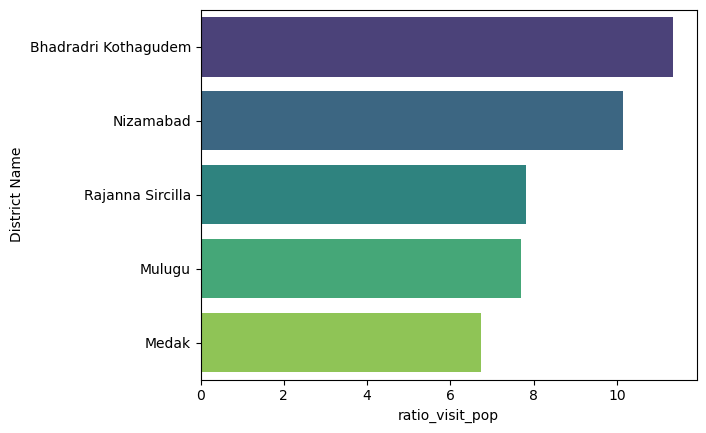

In [65]:
top5_ratio_footfall=population.head(5)
sns.barplot(top5_ratio_footfall,y='District Name',x='ratio_visit_pop',palette='viridis')


<Axes: xlabel='ratio_visit_pop', ylabel='District Name'>

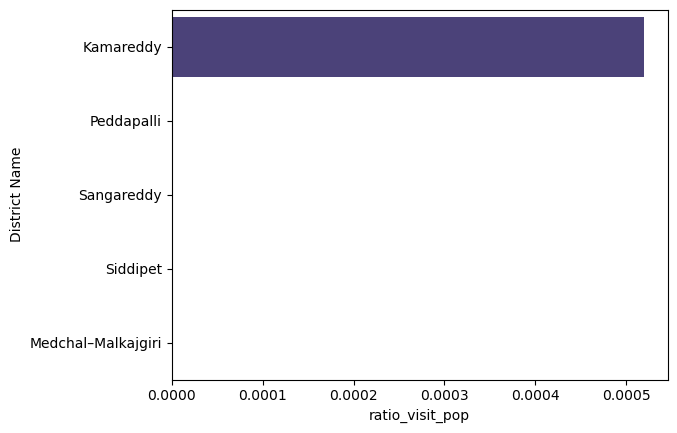

In [66]:
bottom5_ratio_footfall=population.tail(5)
sns.barplot(bottom5_ratio_footfall,y='District Name',x='ratio_visit_pop',palette='viridis')

In [67]:
df_dom_monthwise=df_dom.groupby(['year','month']).agg({'visitors':'sum'})
df_dom_monthwise


visitors
year month              
2016 April       5240071
     August      5904126
     December    5055008
     February   25675243
     January     7773492
     July        3999732
     June       15406150
     March       7315916
     May         4842816
     November    5002576
     October     4473561
     September   4472139
2017 April       7174972
     August      6774758
     December   11772522
     February    7352530
     January     6638294
     July        5547058
     June        6717719
     March       6170773
     May         6721830
     November    7219814
     October     6972887
     September   6203439
2018 April       5738278
     August      4623309
     December    6497643
     February   18591596
     January    16188552
     July        5028131
     June        5099789
     March       8428964
     May         5954171
     November    5489447
     October     5845203
     September   5393246
2019 April       5802032
     August      5010596
     December    6505050
     February    6456354
     January    10782269
     July        4598041
     June       15913901
     March       6824552
     May         5362112
     November    5836604
     October     5202274
     September   4742109

In [68]:
df_year_dom=df_dom.groupby(['year']).agg({'visitors':'sum'})
df_year_dom

,visitors
year,
2016,95160830
2017,85266596
2018,92878329
2019,83035894


In [69]:
growth_rates=[]
for i in range(1,len(df_year_dom)):
    growth_rate=(df_year_dom.iloc[i]/df_year_dom.iloc[i-1])-1
    growth_rates.append(growth_rate)
        

In [70]:
avg_growth_rate=np.mean(growth_rates)
previous_year_tourists=df_year_dom.iloc[-1]
projected_tourists_dom = previous_year_tourists * (1 + avg_growth_rate)**6

In [71]:
avg_growth_rate

-0.04022509097797059

In [72]:
pd.options.display.float_format = '{:.5f}'.format

In [73]:
projected_tourists_dom

visitors   64905607.45602
Name: 2019, dtype: float64

In [74]:
df_year_for=df_for.groupby(['year']).agg({'visitors':'sum'})
df_year_for

,visitors
year,
2016,166570
2017,251846
2018,318154
2019,323326


In [75]:
growth_rates_for=[]
for i in range(1,len(df_year_for)):
    growth_rate_for=(df_year_for.iloc[i]/df_year_for.iloc[i-1])-1
    growth_rates_for.append(growth_rate_for)

In [76]:
avg_growth_rate_for=np.mean(growth_rates_for)
previous_year_tourists_for=df_year_for.iloc[-1]
projected_tourists_for = previous_year_tourists_for * (1 + avg_growth_rate_for)**6

In [77]:
projected_tourists_for

visitors   1317581.43061
Name: 2019, dtype: float64

# Projected Foreign visitors revenue

In [78]:
foreign_visitors_avg_spend=5600
total_projected_revernue_for=projected_tourists_for.iloc[0]*foreign_visitors_avg_spend

In [79]:
print(f'₹ {total_projected_revernue_for.round(2)}')

₹ 7378456011.42


# Projected Domestic visitors revenue

In [80]:
domestic_visitors_avg_spend=1200
total_projected_revernue_dom=projected_tourists_dom.iloc[0]*domestic_visitors_avg_spend

In [81]:
print(f'₹ {total_projected_revernue_dom.round(2)}')

₹ 77886728947.22


In [82]:
df_pivot_dom=df_dom.pivot_table(index='district',columns='year',values='visitors',aggfunc='sum')

In [83]:
growth_rates_district=[]
for i in range(1,4):
    growth_rate_dom_district=(df_pivot_dom.iloc[:,i]-df_pivot_dom.iloc[:,i-1])/(df_pivot_dom.iloc[:,i-1])-1
    growth_rates_district.append(growth_rate_dom_district)

In [84]:
potential_district_dom=(growth_rates_district[1]+growth_rates_district[2]+growth_rates_district[0])/3

In [85]:
potential_district_dom=potential_district_dom.replace([np.nan,np.inf],0)

<Axes: xlabel='district'>

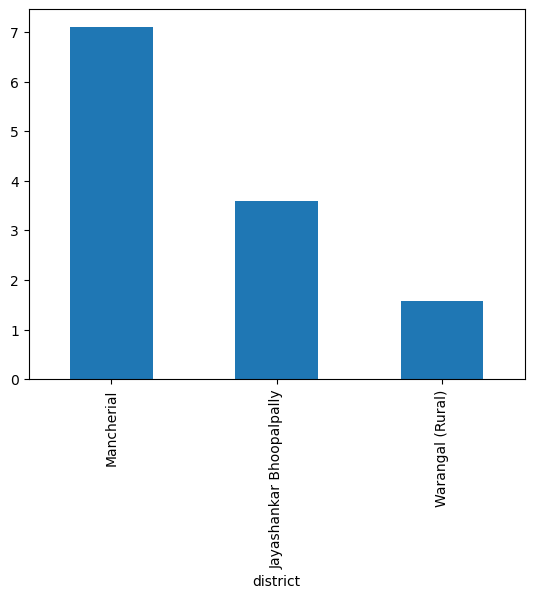

In [86]:
potential_district_dom.sort_values(ascending=False).head(3).plot.bar()

In [87]:
df_pivot_for=df_for.pivot_table(index='district',columns='year',values='visitors',aggfunc='sum')

In [88]:
growth_rates_district_for=[]
for i in range(1,4):
    growth_rate_for_district=(df_pivot_for.iloc[:,i]-df_pivot_for.iloc[:,i-1])/(df_pivot_for.iloc[:,i-1])-1
    growth_rates_district_for.append(growth_rate_for_district)

In [89]:
potential_district_for=(growth_rates_district_for[1]+growth_rates_district_for[2]+growth_rates_district_for[0])/3

In [90]:
potential_district_for=potential_district_for.replace([np.nan,np.inf],0)

<Axes: xlabel='district'>

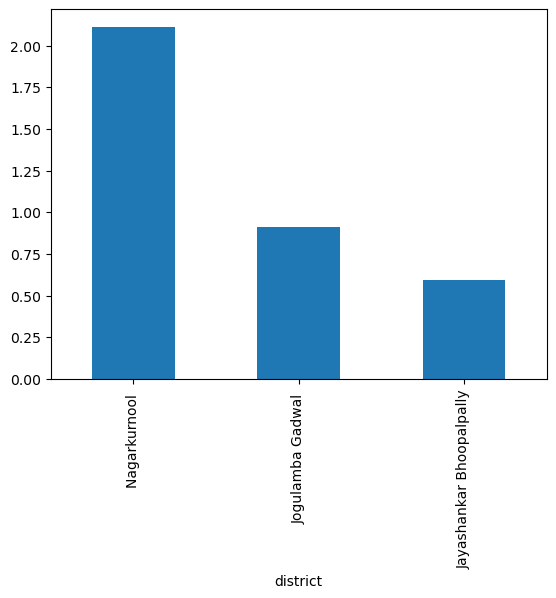

In [91]:
potential_district_for.sort_values(ascending=False).head(3).plot.bar()

In [93]:
years=[2018,2019,2020,2021]
crime_df=pd.DataFrame(data={'Crime Number':[126858,131254,147504,158809]},index=years)

In [94]:
crime_growth_rate=[]
for i in range(1,len(years)):
    growth_rate=(crime_df.iloc[i,0]/crime_df.iloc[i-1,0])-1
    crime_growth_rate.append(growth_rate)
crime_growth_rate

[0.03465291901180856, 0.12380575068188393, 0.07664198936977984]

In [99]:
np.mean(crime_growth_rate)*100

7.836688635449078

In [98]:
crime_df.to_csv('Crime Rate.csv')